## Used Car Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
car_data = pd.read_csv("cars.csv")

In [3]:
car_data.shape

(1725, 11)

- Dataset has 1725 rows and 11 columns

In [4]:
car_data.head() # first five rows of dataset

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


- Dataseet has 6 numeric and 5 categorical columns

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
car_data.describe()

,Id,year,price,distance_travelled(kms),brand_rank,car_age
count,"1,725.00","1,725.00","1,725.00","1,725.00","1,725.00","1,725.00"
mean,862.00,"2,015.39","1,494,837.39","53,848.26",15.73,5.61
std,498.11,3.21,"1,671,657.73","44,725.54",12.95,3.21
min,0.00,"1,990.00","62,500.00",350.00,1.00,0.00
25%,431.00,"2,013.00","545,000.00","29,000.00",5.00,3.00
50%,862.00,"2,016.00","875,000.00","49,000.00",14.00,5.00
75%,"1,293.00","2,018.00","1,825,000.00","70,500.00",24.00,8.00
max,"1,724.00","2,021.00","14,700,000.00","790,000.00",81.00,31.00


- Data is from year 1990 to 2021
- Minimum price is 62,500
- There is huge difference between 50th percentile price and 75th percentile price
- There is huge difference between 75th percentile price and max price
- Minimum disctance travelled is 350 and maximum is 790,000.
- There is huge difference between 75th percentile distance and max distance.
- Car rank lies between 1 and 81.
- There is huge difference between 75th percentile rank and max rank.
- Car age is in between 0 and 31.
- There is huge difference between 75th percentile age and max age.



In [7]:
car_data.isnull().sum()

Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

- No null values in datase

In [8]:
car_data.duplicated().sum()

0

- No duplicate values in dataset

## Uni-variate Analysis

##### Car price

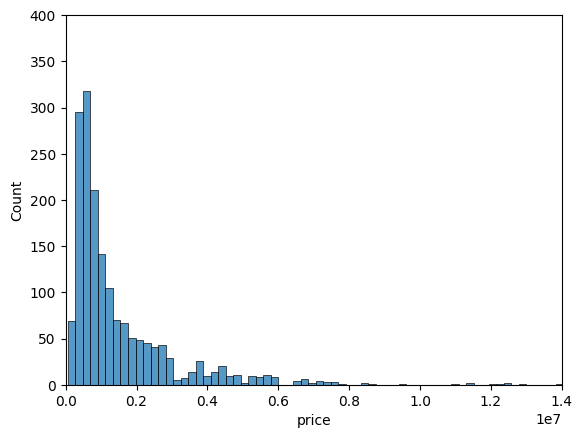

In [9]:
sns.histplot(data=car_data, x="price")
plt.ylim(0,400)
plt.xlim(0,14000000)
plt.show()

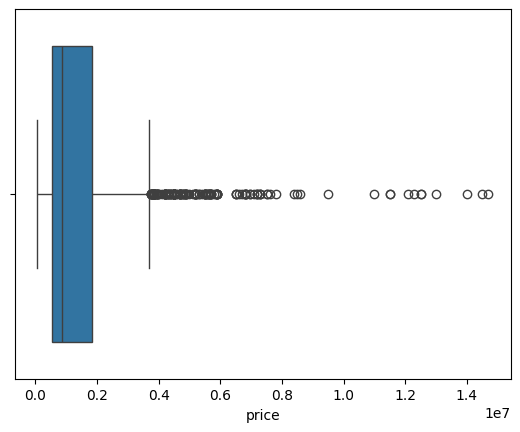

In [10]:
sns.boxplot(x=car_data["price"])
plt.show()

In [11]:
car_data.price.unique()[0:10]

array([ 425000.,  325000., 2650000., 4195000.,  475000.,  335000.,
        750000., 5500000.,  565000.,  510000.])

- Car price ranges between 50,000 and 400,000 in general (min and max as per histogram and box plot)
- Most cars are priced between 100,000 and 200,000 (25th percentile and 75th percentile)
- Beyond 1,000,000 looks like ouliers.

##### Distance Travelled

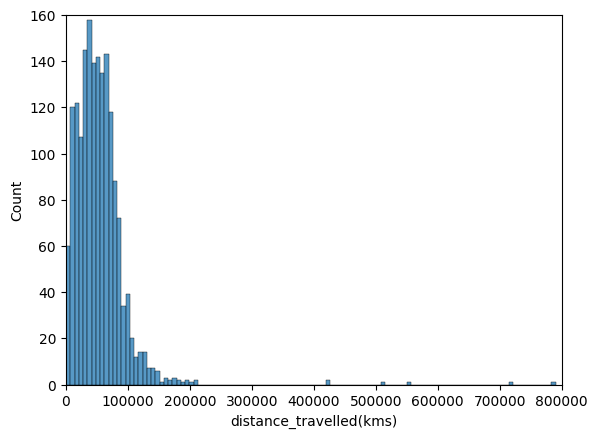

In [12]:
sns.histplot(data=car_data, x="distance_travelled(kms)")
plt.ylim(0,160)
plt.xlim(0,800000)
plt.show()

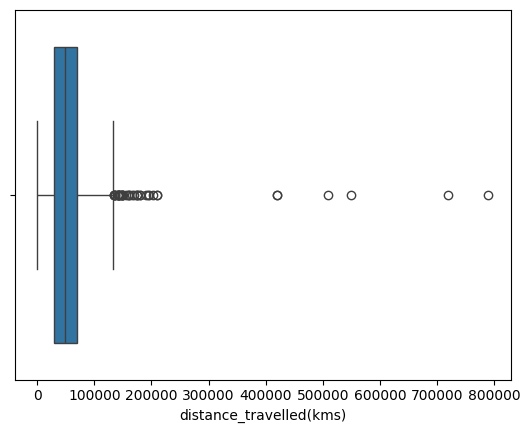

In [13]:
sns.boxplot(data=car_data, x="distance_travelled(kms)")
plt.show()

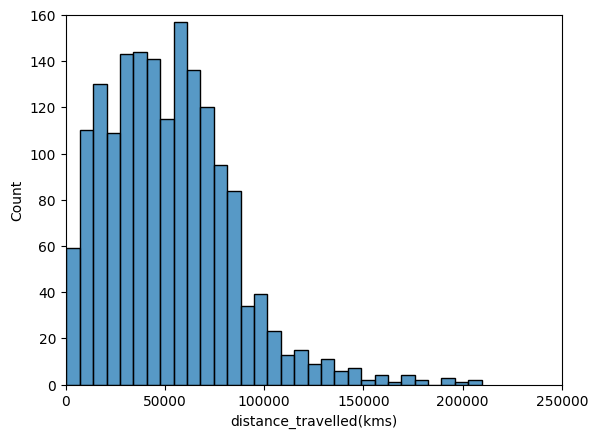

In [14]:
sns.histplot(data=car_data[car_data['distance_travelled(kms)']<250000], x="distance_travelled(kms)")
plt.ylim(0,160)
plt.xlim(0,250000)
plt.show()

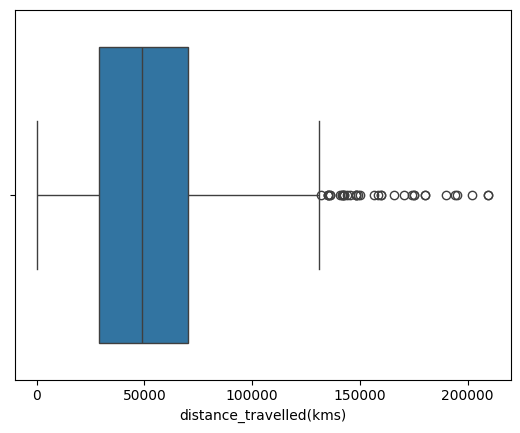

In [15]:
sns.boxplot(data=car_data[car_data['distance_travelled(kms)']<250000], x="distance_travelled(kms)")
plt.show()

- Most cars have travelled distance less than 100,000
- Very cars have travlled more than 200,000

##### Brand Rank

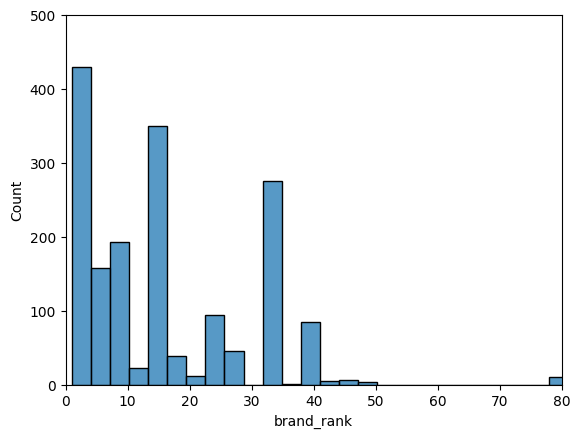

In [16]:
sns.histplot(data=car_data, x="brand_rank")
plt.ylim(0,500)
plt.xlim(0,80)
plt.show()

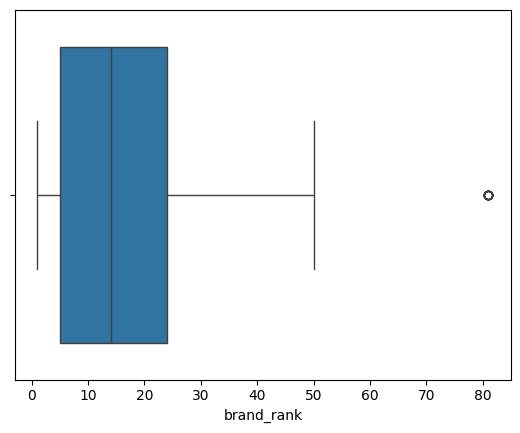

In [17]:
sns.boxplot(data=car_data, x="brand_rank")
plt.show()

- Brand rank lies between 1 and 50 (max and min)
- Most of the brand rank is between 5 and 25 (25th and 75th pecentile)
- Brand rank 80 looks like outlier

##### Car Age

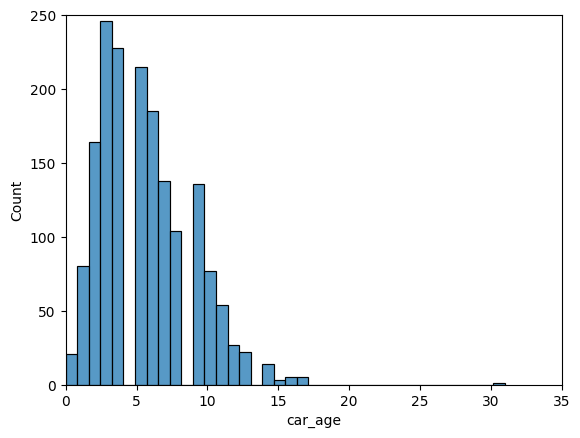

In [18]:
sns.histplot(data=car_data, x="car_age")
plt.ylim(0,250)
plt.xlim(0,35)
plt.show()

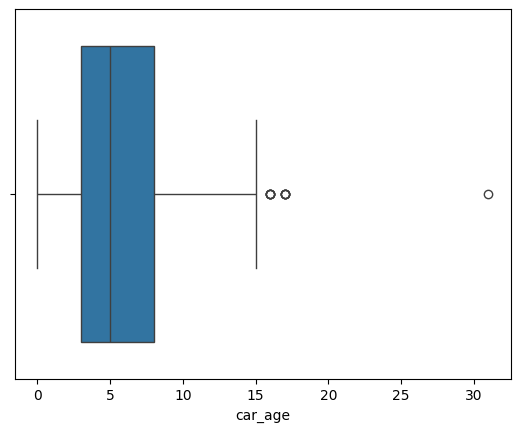

In [19]:
sns.boxplot(data=car_data, x="car_age")
plt.show()

- Cars are aged between 0 and 15 years.
- Most cars are aged between 3 and 8 years

##### Brand

##### Most selling brand

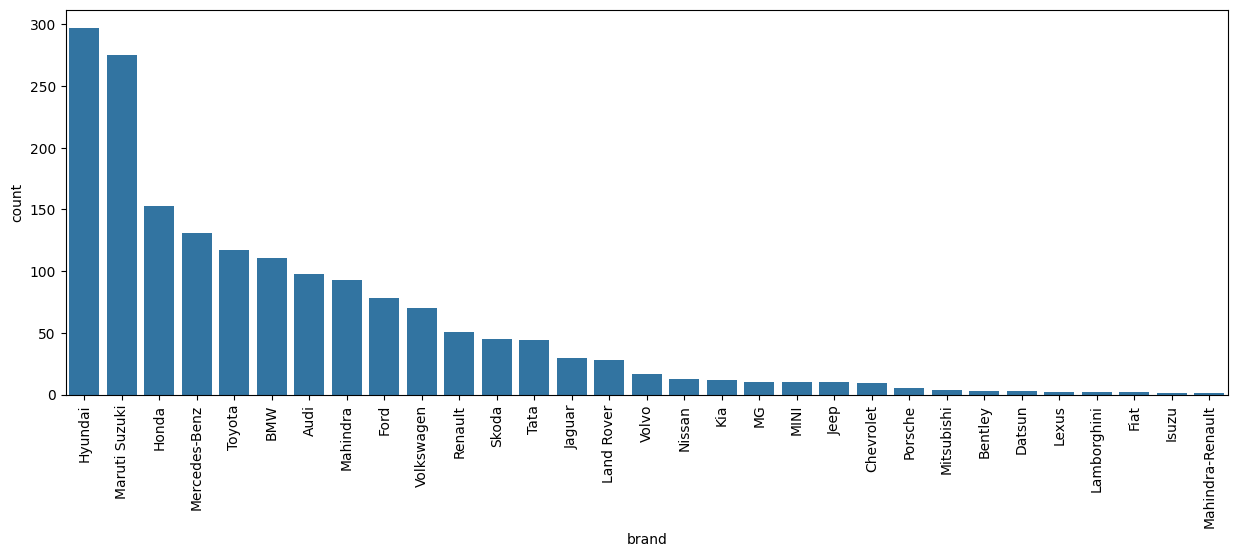

In [20]:
plt.figure(figsize=(15,5))
order_by_count = car_data['brand'].value_counts().index
sns.countplot(data=car_data, x="brand" , order=order_by_count)
plt.xticks(rotation=90)
plt.show()

In [21]:
car_data.brand.value_counts()[0:10]

Hyundai          297
Maruti Suzuki    275
Honda            153
Mercedes-Benz    131
Toyota           117
BMW              111
Audi              98
Mahindra          93
Ford              78
Volkswagen        70
Name: brand, dtype: int64

- Hyundai is the most selling brand followed by Maruti suzuki

In [22]:
hyundai = car_data[car_data['brand'] == 'Hyundai']['price'].mean()
print(f'The mean price of Hyundai is {hyundai:.2f} Rupees')

The mean price of Hyundai is 758575.76 Rupees


In [23]:
car_data.model_name.value_counts()[0:10]

Creta       71
Innova      69
City        68
Swift       58
XUV500      46
Elite       44
Grand       41
Verna       41
EcoSport    38
Ciaz        34
Name: model_name, dtype: int64

- Most selling model name is Creta.

In [24]:
car_data.full_model_name.value_counts()[0:10]

Ford EcoSport Titanium 1.5L TDCi                 12
Toyota Innova Crysta 2.4 VX 8 STR [2016-2020]    11
Audi Q7 3.0 TDI quattro Premium Plus             11
Honda City 1.5 S MT                              11
Volkswagen Polo GT TSI                           11
Honda WR-V VX MT Diesel                           9
Hyundai i10 Sportz 1.2 Kappa2                     9
Renault Kwid 1.0 RXT AMT Opt [2016-2019]          9
BMW 5 Series 520d Luxury Line [2017-2019]         9
Toyota Innova Crysta 2.4 VX 7 STR [2016-2020]     9
Name: full_model_name, dtype: int64

- Most selling model(full name) is Ford EcoSport Titanium 1.5L TDCi

##### Fuel type

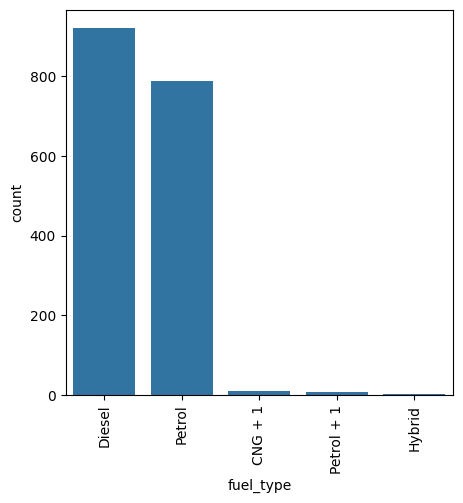

In [25]:
plt.figure(figsize=(5,5))
order_by_count = car_data['fuel_type'].value_counts().index
sns.countplot(data=car_data, x="fuel_type" , order= order_by_count)
plt.xticks(rotation=90)
plt.show()

- Diesel is the most popular fuel type followed by petrol

##### City

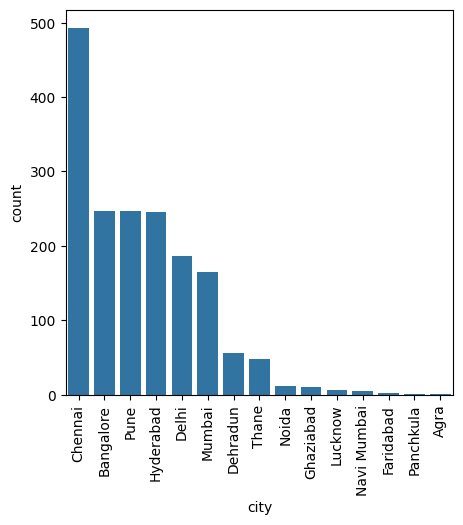

In [26]:
plt.figure(figsize=(5,5))
order_by_count = car_data['city'].value_counts().index
sns.countplot(data=car_data, x="city" , order = order_by_count)
plt.xticks(rotation=90)
plt.show()

- As per the dataset Chennai has maximum number of cars followed by Bangalore , Pune and Hyderabad.

#### Bi-vaiate

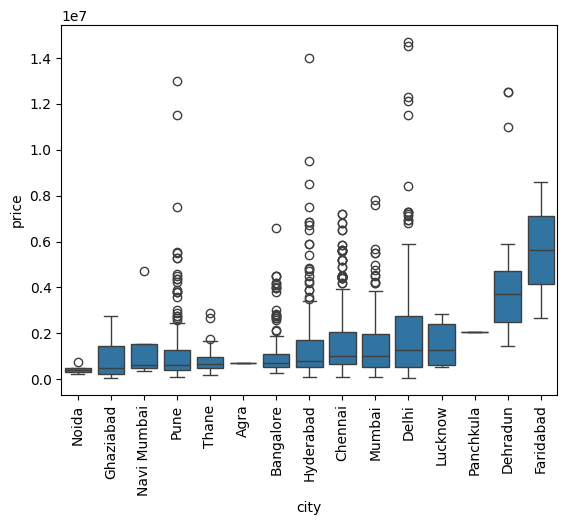

In [27]:
category_order = car_data.groupby('city')['price'].median().sort_values().index
sns.boxplot(x=car_data["city"], y=car_data["price"] , order = category_order)
plt.xticks(rotation=90)
plt.show()

- High priced cars are in Faridabad and Dehradun
- Low priced cars are in Noida , Ghaziabad and Navi Mumbai

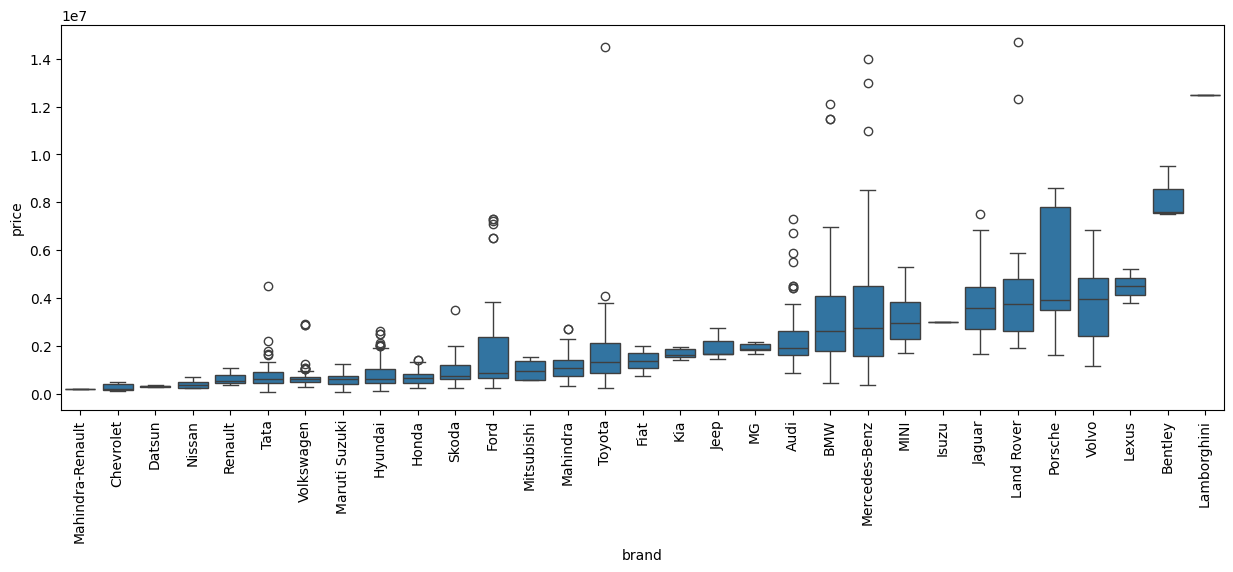

In [28]:
plt.figure(figsize=(15,5))
category_order = car_data.groupby('brand')['price'].median().sort_values().index
sns.boxplot(x=car_data["brand"], y=car_data["price"] , order = category_order)
plt.xticks(rotation=90)
plt.show()

- Top five most costly brand are Lamborghini , Bentley , Lexus , Volvo and Porsche.
- Five most cheap model are Mahindra-Renault , Chevorlet , Datsun , Nissan and Renault.

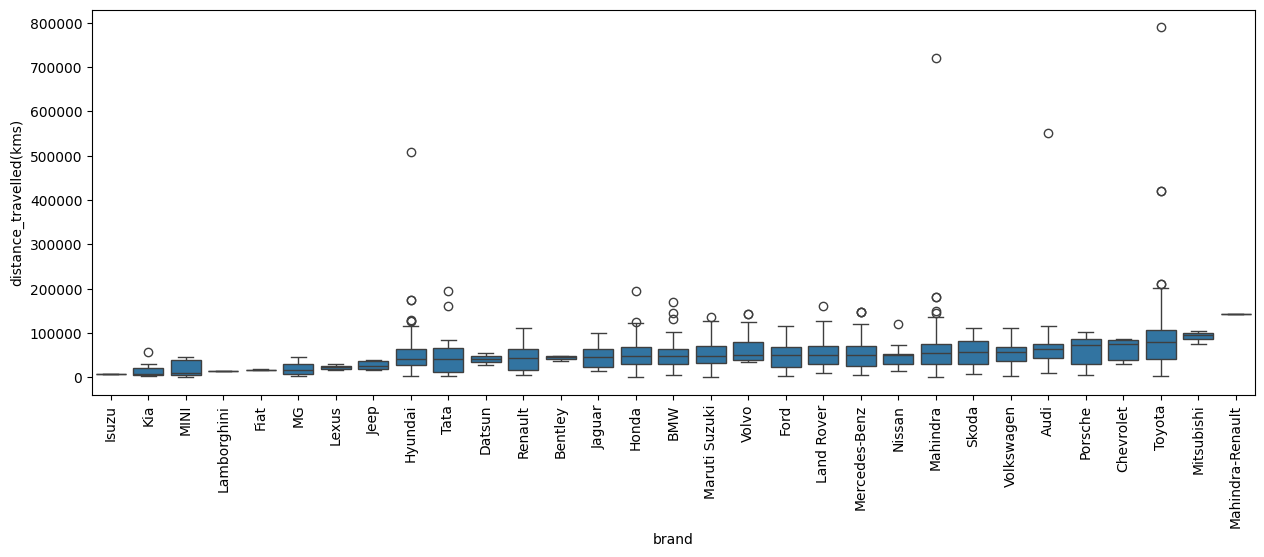

In [29]:
plt.figure(figsize=(15,5))
category_order = car_data.groupby('brand')['distance_travelled(kms)'].median().sort_values().index
sns.boxplot(x=car_data["brand"], y=car_data["distance_travelled(kms)"] , order=category_order)
plt.xticks(rotation=90)
plt.show()

- Mahindra Renault , Mitsubishi , Toyota , Chevrolet , Porsche have travelled maximum distance.

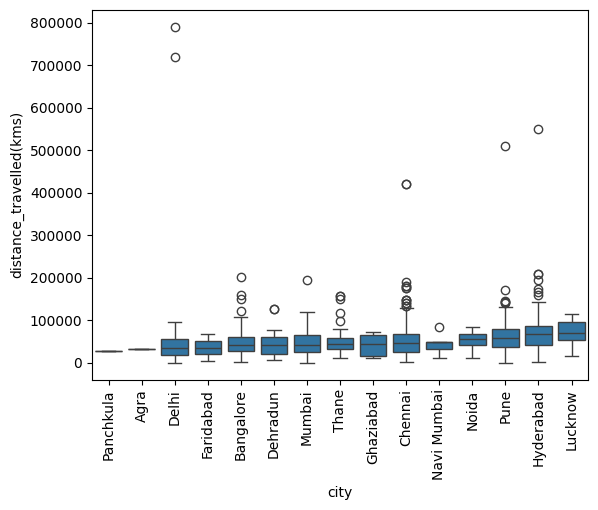

In [30]:
category_order = car_data.groupby('city')['distance_travelled(kms)'].median().sort_values().index
sns.boxplot(x=car_data["city"], y=car_data["distance_travelled(kms)"] , order = category_order)
plt.xticks(rotation=90)
plt.show()

- Cars in Lucknow , Hyderabad and Pune have travelled maximum distance.

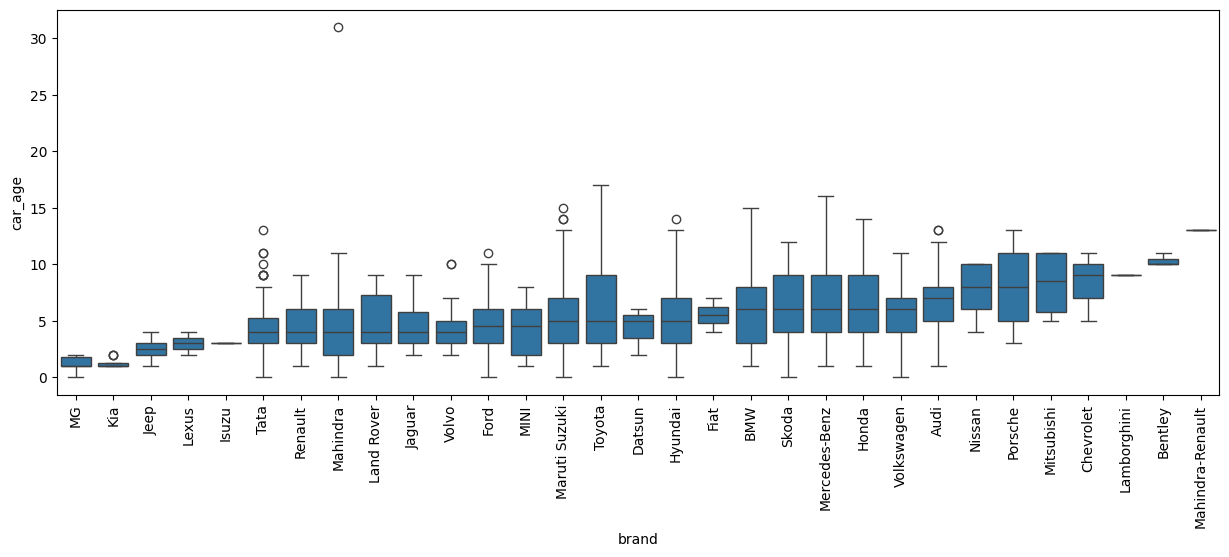

In [31]:
plt.figure(figsize=(15,5))
category_order = car_data.groupby('brand')['car_age'].median().sort_values().index
sns.boxplot(x=car_data["brand"], y=car_data["car_age"] , order = category_order)
plt.xticks(rotation=90)
plt.show()

- Mahindra renault , Bentley , Lamborghini , Chevrolet , Mitsubishi and Porsche have the oldest cars.

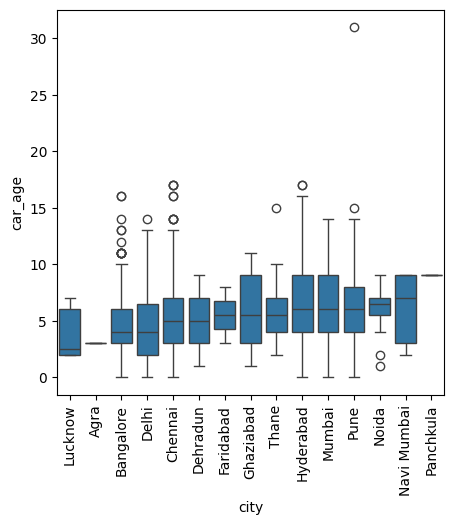

In [32]:
plt.figure(figsize=(5,5))
category_order = car_data.groupby('city')['car_age'].median().sort_values().index
sns.boxplot(x=car_data["city"], y=car_data["car_age"] , order = category_order)
plt.xticks(rotation=90)
plt.show()

- Oldest car can be found in Panchkula , Navi Mumbai , Noida , Pune and Mumbai.

In [33]:
pd.pivot_table(car_data, values='price',index='brand' , columns='fuel_type', aggfunc='mean')

fuel_type,CNG + 1,Diesel,Hybrid,Petrol,Petrol + 1
brand,,,,,
Audi,NaN,"2,297,150.54",NaN,"1,314,800.00",NaN
BMW,NaN,"3,161,100.00",NaN,"3,588,761.90",NaN
Bentley,NaN,NaN,NaN,"8,200,000.00",NaN
Chevrolet,NaN,"372,500.00",NaN,"201,400.00",NaN
Datsun,NaN,NaN,NaN,"310,000.00",NaN
Fiat,NaN,"740,000.00",NaN,"2,000,000.00",NaN
Ford,NaN,"1,539,722.22",NaN,"2,198,541.67",NaN
Honda,NaN,"752,424.24",NaN,"632,616.67",NaN
Hyundai,NaN,"924,566.27",NaN,"696,399.06","225,000.00"


In [34]:
pd.pivot_table(car_data, values='price',index='city' , columns='fuel_type', aggfunc='mean')

fuel_type,CNG + 1,Diesel,Hybrid,Petrol,Petrol + 1
city,,,,,
Agra,NaN,NaN,NaN,"695,000.00",NaN
Bangalore,NaN,"1,683,428.57","2,100,000.00","674,769.23",NaN
Chennai,NaN,"1,863,459.28",NaN,"903,010.75",NaN
Dehradun,NaN,"3,508,888.89",NaN,"5,313,636.36",NaN
Delhi,"535,000.00","2,919,920.45",NaN,"1,634,057.29","242,500.00"
Faridabad,NaN,"2,650,000.00",NaN,"8,600,000.00",NaN
Ghaziabad,NaN,"959,750.00",NaN,"806,666.67",NaN
Hyderabad,"320,000.00","1,582,055.21",NaN,"1,175,437.50",NaN
Lucknow,NaN,"1,529,166.67",NaN,NaN,NaN


#### Numeric Columns

In [35]:
num_cols = ['price', 'distance_travelled(kms)' , 'brand_rank','car_age']
car_data[num_cols].corr()

,price,distance_travelled(kms),brand_rank,car_age
price,1.00,-0.14,-0.16,-0.29
distance_travelled(kms),-0.14,1.00,-0.11,0.39
brand_rank,-0.16,-0.11,1.00,-0.13
car_age,-0.29,0.39,-0.13,1.00


- Price has negative correlation with distance travelled , brand rank and age. 
- Age is more negatively correlated to price than brand rank and distance travelled.
- Car age and distance travelled are positively correlated.

##### Detecting Outlier and Capping it

In [36]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = car_data[col].quantile(0.25)
    percentile75 = car_data[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    car_data.loc[(car_data[col]>upper_limit), col]= upper_limit
    car_data.loc[(car_data[col]<lower_limit), col]= lower_limit    
    return car_data

##### Why are we capping it and why not trim it ?

- Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.

- In this cases, we can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

In [37]:
# Create backup dataset
car_data_backup = car_data.copy()

In [38]:
for col in num_cols:
    detect_outliers(col)


 #### price ####
percentile25 545000.0
percentile75 1825000.0
Upper limit 3745000.0
Lower limit -1375000.0

 #### distance_travelled(kms) ####
percentile25 29000.0
percentile75 70500.0
Upper limit 132750.0
Lower limit -33250.0

 #### brand_rank ####
percentile25 5.0
percentile75 24.0
Upper limit 52.5
Lower limit -23.5

 #### car_age ####
percentile25 3.0
percentile75 8.0
Upper limit 15.5
Lower limit -4.5


In [39]:
car_data[num_cols].skew(axis=0, skipna=True)

price                     1.17
distance_travelled(kms)   0.60
brand_rank                0.72
car_age                   0.67
dtype: float64

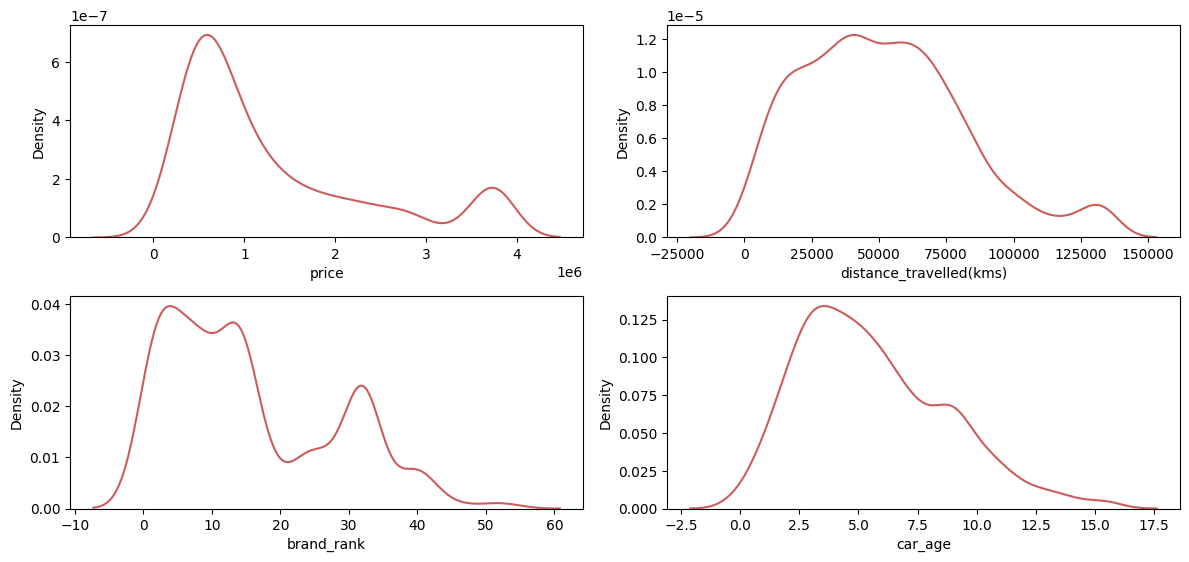

In [40]:
# distribution of data after scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=car_data[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

- After Capping Outlier it is all column's distribution is Normal so transformation is not required.

##### Drop unwanted columns
- Id does not add any information , so we will drop it.
- Year and age are highly corrrelated , so we will drop year.
- Analysis will be done with only brand , will drop model_name and full_model_name

In [41]:
car_final = car_data.drop(['Id', 'year', 'model_name', 'full_model_name'], axis=1)

In [42]:
car_final.head()

,brand,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,Honda,"425,000.00","9,680.00",Petrol,Mumbai,7.00,5.00
1,Nissan,"325,000.00","119,120.00",Diesel,Mumbai,11.00,9.00
2,Toyota,"2,650,000.00","64,593.00",Diesel,Thane,1.00,4.00
3,Mercedes-Benz,"3,745,000.00","25,000.00",Diesel,Mumbai,2.00,4.00
4,Hyundai,"475,000.00","23,800.00",Diesel,Mumbai,14.00,9.00


##### Categorical columns

In [43]:
# encoding of categorical columns
car_encoded = pd.get_dummies(car_final, columns=['brand', 'fuel_type','city'] , drop_first= True)

In [44]:
car_encoded.head()

,price,distance_travelled(kms),brand_rank,car_age,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Ford,...,city_Faridabad,city_Ghaziabad,city_Hyderabad,city_Lucknow,city_Mumbai,city_Navi Mumbai,city_Noida,city_Panchkula,city_Pune,city_Thane
0,"425,000.00","9,680.00",7.00,5.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"325,000.00","119,120.00",11.00,9.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,"2,650,000.00","64,593.00",1.00,4.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,"3,745,000.00","25,000.00",2.00,4.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,"475,000.00","23,800.00",14.00,9.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Split X and Y

In [45]:
X = car_encoded.drop(['price'], axis=1)
y = car_encoded['price']

In [46]:
X.head()

,distance_travelled(kms),brand_rank,car_age,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Ford,brand_Honda,...,city_Faridabad,city_Ghaziabad,city_Hyderabad,city_Lucknow,city_Mumbai,city_Navi Mumbai,city_Noida,city_Panchkula,city_Pune,city_Thane
0,"9,680.00",7.00,5.00,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,"119,120.00",11.00,9.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,"64,593.00",1.00,4.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,"25,000.00",2.00,4.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,"23,800.00",14.00,9.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
y.head()

0     425,000.00
1     325,000.00
2   2,650,000.00
3   3,745,000.00
4     475,000.00
Name: price, dtype: float64

##### Trian Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1380, 51), (345, 51))

##### Scaling of Numerical columns

In [50]:
from sklearn.preprocessing import StandardScaler
X_num_cols = ['distance_travelled(kms)' , 'brand_rank','car_age']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[X_num_cols])
X_test_scaled = scaler.transform(X_train[X_num_cols])

##### Model Building and Evaluation

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [52]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list_test =[]
r2_list_train =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    r2_list_train.append(model_train_r2)

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list_test.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 476651.1557
- Mean Absolute Error: 352014.0494
- R2 Score: 0.7970
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 521007.9907
- Mean Absolute Error: 371695.3479
- R2 Score: 0.7820


Lasso
Model performance for Training set
- Root Mean Squared Error: 476656.4260
- Mean Absolute Error: 352055.7156
- R2 Score: 0.7970
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 523409.8788
- Mean Absolute Error: 373204.6279
- R2 Score: 0.7799


Ridge
Model performance for Training set
- Root Mean Squared Error: 480990.1743
- Mean Absolute Error: 356038.5271
- R2 Score: 0.7933
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 522634.1289
- Mean Absolute Error: 371637.5162
- R2 Score: 0.7806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 815929.6930
- Mean 

In [54]:
df_results = pd.DataFrame(list(zip(model_list, r2_list_test,r2_list_train)), 
             columns=['Model Name','R2_Score_Test','R2_Score_Train']).sort_values(by=["R2_Score_Test"],ascending=False)

In [55]:
df_results

,Model Name,R2_Score_Test,R2_Score_Train
5,Random Forest Regressor,0.83,0.98
6,XGBRegressor,0.82,0.99
0,Linear Regression,0.78,0.80
2,Ridge,0.78,0.79
1,Lasso,0.78,0.80
4,Decision Tree,0.78,1.00
7,AdaBoost Regressor,0.59,0.57
3,K-Neighbors Regressor,0.07,0.41


- Random forest regressor and XGBRegressor have best test r2 score but it seems they are overfitting.
- Linear regression , ridge and lasso have slightly less test R2 score but they are not overfitting.
- We will try hyper parameter tuning for RF and XGB

In [56]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [57]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params),
                   ('XGBoost', XGBRegressor(), xgboost_params),
                ]

In [58]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.3}


In [59]:
model_param['RF']

{'n_estimators': 1000,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': None}

In [60]:
# Run models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
    "XGBRegressor": XGBRegressor(**model_param['XGBoost'], n_jobs=-1), 
}

model_list = []
r2_train_tuned =[]
r2_test_tuned =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    r2_train_tuned.append(model_train_r2)
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_test_tuned.append(model_test_r2)
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 145073.1794
- Mean Absolute Error: 85439.3616
- R2 Score: 0.9812
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 453646.9432
- Mean Absolute Error: 248316.4020
- R2 Score: 0.8347


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 147620.4388
- Mean Absolute Error: 99846.7195
- R2 Score: 0.9805
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 453876.1013
- Mean Absolute Error: 261096.5476
- R2 Score: 0.8345




In [61]:
df_tuned = pd.DataFrame(list(zip(model_list, r2_test_tuned,r2_train_tuned)), 
             columns=['Model Name','R2_Tuned_Test','R2_Tuned_Train']).sort_values(by=["R2_Tuned_Test"],ascending=False)

In [62]:
df_tuned

,Model Name,R2_Tuned_Test,R2_Tuned_Train
0,Random Forest Regressor,0.83,0.98
1,XGBRegressor,0.83,0.98


- Random forest regressor and XGBRegressor have best r2 score but it seems they are overfitting even after hyperparameter tuning

##### We will try statsmodel.

In [63]:
import statsmodels.api as sm

In [64]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X)
results = model.fit()

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     106.6
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:10:54   Log-Likelihood:                -20001.
No. Observations:                1380   AIC:                         4.010e+04
Df Residuals:                    1330   BIC:                         4.036e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.434e+06   5.24e+05      4.642      0.000    1.41e+06    3.46e+06
distance_travelled(kms)    -1.6937      0.606     -2.797      0.005      -2.882      -0.506
brand_rank              -7346.0154   2822.624     -2.603      0.009   -1.29e+04   -1808.736
car_age                  -1.26e+05   5491.357    -22.953      0.000   -1.37e+05   -1.15e+05
brand_BMW                4.401e+05    8.4e+04      5.238      0.000    2.75e+05    6.05e+05
brand_Bentley            2.556e+06   2.66e+05      9.597      0.000    2.03e+06    3.08e+06
brand_Chevrolet         -1.454e+06   2.06e+05     -7.066      0.000   -1.86e+06   -1.05e+06
brand_Datsun            -1.527e+06   2.66e+05     -5.748      0.000   -2.05e+06   -1.01e+06
brand_Fiat              -5.695e+05   3.22e+05     -1.767      0.077    -1.2e+06    6.28e+04
brand_Ford              -7.793e+05   8.63e+04     -9.027      0.000   -9.49e+05    -6.1e+05
brand_Honda             -1.331e+06   7.91e+04    -16.819      0.000   -1.49e+06   -1.18e+06
brand_Hyundai            -1.35e+06   6.34e+04    -21.291      0.000   -1.47e+06   -1.23e+06
brand_Isuzu             -1.933e-10      2e-09     -0.096      0.923   -4.12e-09    3.74e-09
brand_Jaguar             1.046e+06   1.24e+05      8.424      0.000    8.03e+05    1.29e+06
brand_Jeep              -7.122e+05   2.25e+05     -3.167      0.002   -1.15e+06   -2.71e+05
brand_Kia               -9.543e+05    1.8e+05     -5.295      0.000   -1.31e+06   -6.01e+05
brand_Lamborghini        2.116e+06   3.28e+05      6.458      0.000    1.47e+06    2.76e+06
brand_Land Rover         1.027e+06   1.21e+05      8.474      0.000    7.89e+05    1.26e+06
brand_Lexus              1.107e+06   4.89e+05      2.264      0.024    1.48e+05    2.07e+06
brand_MG                -5.047e+05   1.95e+05     -2.586      0.010   -8.88e+05   -1.22e+05
brand_MINI               7.501e+05   1.84e+05      4.074      0.000    3.89e+05    1.11e+06
brand_Mahindra          -1.134e+06   7.28e+04    -15.565      0.000   -1.28e+06   -9.91e+05
brand_Mahindra-Renault  -7.933e+05   4.82e+05     -1.644      0.100   -1.74e+06    1.53e+05
brand_Maruti Suzuki     -1.358e+06   6.35e+04    -21.400      0.000   -1.48e+06   -1.23e+06
brand_Mercedes-Benz      4.837e+05   8.47e+04      5.709      0.000    3.17e+05     6.5e+05
brand_Mitsubishi        -3.951e+05   2.66e+05     -1.487      0.137   -9.16e+05    1.26e+05
brand_Nissan            -1.377e+06   1.66e+05     -8.307      0.000    -1.7e+06   -1.05e+06
brand_Porsche              1.4e+06    2.4e+05      5.845      0.000     9.3e+05    1.87e+06
brand_Renault           -1.627e+06   9.17e+04    -17.741      0.000   -1.81e+06   -1.45e+06
brand_Skoda             -9.177e+05   9.41e+04     -9.748      0.000    -1.1e+06   -7.33e+05
brand_Tata              -1.288e+06   1.04e+05  

- Statsmdel gives a R2 score of 0.797

##### Drop high p-value and run model again

In [66]:
X_train_1 = X.drop('fuel_type_Petrol + 1',axis=1)

In [67]:
X_train_1.head()

,const,distance_travelled(kms),brand_rank,car_age,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Ford,...,city_Faridabad,city_Ghaziabad,city_Hyderabad,city_Lucknow,city_Mumbai,city_Navi Mumbai,city_Noida,city_Panchkula,city_Pune,city_Thane
107,1.00,"91,000.00",1.00,7.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
522,1.00,"36,986.00",14.00,3.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1706,1.00,"12,500.00",32.00,2.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
704,1.00,"2,750.00",8.00,2.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
677,1.00,"10,100.00",14.00,3.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
model = sm.OLS(y_train,X_train_1)
results = model.fit()

In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     108.9
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:10:54   Log-Likelihood:                -20001.
No. Observations:                1380   AIC:                         4.010e+04
Df Residuals:                    1331   BIC:                         4.036e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.434e+06   5.12e+05      4.750      0.000    1.43e+06    3.44e+06
distance_travelled(kms)    -1.6937      0.605     -2.798      0.005      -2.881      -0.506
brand_rank              -7346.2305   2819.735     -2.605      0.009   -1.29e+04   -1814.622
car_age                  -1.26e+05   5488.681    -22.964      0.000   -1.37e+05   -1.15e+05
brand_BMW                4.401e+05    8.4e+04      5.240      0.000    2.75e+05    6.05e+05
brand_Bentley            2.556e+06   2.66e+05      9.601      0.000    2.03e+06    3.08e+06
brand_Chevrolet         -1.454e+06   2.06e+05     -7.069      0.000   -1.86e+06   -1.05e+06
brand_Datsun            -1.527e+06   2.65e+05     -5.751      0.000   -2.05e+06   -1.01e+06
brand_Fiat              -5.695e+05   3.22e+05     -1.768      0.077    -1.2e+06    6.25e+04
brand_Ford              -7.793e+05   8.63e+04     -9.031      0.000   -9.49e+05    -6.1e+05
brand_Honda             -1.331e+06   7.91e+04    -16.826      0.000   -1.49e+06   -1.18e+06
brand_Hyundai            -1.35e+06   6.34e+04    -21.302      0.000   -1.47e+06   -1.23e+06
brand_Isuzu              2.674e-09   1.01e-09      2.652      0.008    6.96e-10    4.65e-09
brand_Jaguar             1.046e+06   1.24e+05      8.429      0.000    8.03e+05    1.29e+06
brand_Jeep              -7.122e+05   2.25e+05     -3.168      0.002   -1.15e+06   -2.71e+05
brand_Kia               -9.543e+05    1.8e+05     -5.297      0.000   -1.31e+06   -6.01e+05
brand_Lamborghini        2.116e+06   3.28e+05      6.461      0.000    1.47e+06    2.76e+06
brand_Land Rover         1.027e+06   1.21e+05      8.478      0.000    7.89e+05    1.26e+06
brand_Lexus              1.107e+06   4.89e+05      2.265      0.024    1.48e+05    2.07e+06
brand_MG                -5.047e+05   1.95e+05     -2.588      0.010   -8.87e+05   -1.22e+05
brand_MINI               7.501e+05   1.84e+05      4.076      0.000    3.89e+05    1.11e+06
brand_Mahindra          -1.134e+06   7.28e+04    -15.573      0.000   -1.28e+06   -9.91e+05
brand_Mahindra-Renault  -7.933e+05   4.82e+05     -1.645      0.100   -1.74e+06    1.53e+05
brand_Maruti Suzuki     -1.358e+06   6.33e+04    -21.441      0.000   -1.48e+06   -1.23e+06
brand_Mercedes-Benz      4.837e+05   8.47e+04      5.711      0.000    3.18e+05     6.5e+05
brand_Mitsubishi        -3.951e+05   2.66e+05     -1.488      0.137   -9.16e+05    1.26e+05
brand_Nissan            -1.377e+06   1.66e+05     -8.310      0.000    -1.7e+06   -1.05e+06
brand_Porsche              1.4e+06   2.39e+05      5.847      0.000     9.3e+05    1.87e+06
brand_Renault           -1.627e+06   9.16e+04    -17.771      0.000   -1.81e+06   -1.45e+06
brand_Skoda             -9.177e+05   9.41e+04     -9.752      0.000    -1.1e+06   -7.33e+05
brand_Tata              -1.288e+06   1.03e+05  

In [70]:
X_train_2 = X_train_1.drop('city_Noida',axis=1)

In [71]:
model_2 = sm.OLS(y_train,X_train_2)
results_2 = model_2.fit()

In [72]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     111.3
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:10:54   Log-Likelihood:                -20001.
No. Observations:                1380   AIC:                         4.010e+04
Df Residuals:                    1332   BIC:                         4.035e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     2.55e+06   2.41e+05     10.571      0.000    2.08e+06    3.02e+06
distance_travelled(kms)    -1.6927      0.605     -2.797      0.005      -2.880      -0.506
brand_rank              -7233.4754   2784.485     -2.598      0.009   -1.27e+04   -1771.021
car_age                  -1.26e+05   5485.550    -22.972      0.000   -1.37e+05   -1.15e+05
brand_BMW                4.408e+05   8.39e+04      5.253      0.000    2.76e+05    6.05e+05
brand_Bentley            2.552e+06   2.66e+05      9.605      0.000    2.03e+06    3.07e+06
brand_Chevrolet         -1.454e+06   2.06e+05     -7.073      0.000   -1.86e+06   -1.05e+06
brand_Datsun            -1.526e+06   2.65e+05     -5.750      0.000   -2.05e+06   -1.01e+06
brand_Fiat               -5.73e+05   3.22e+05     -1.781      0.075    -1.2e+06    5.81e+04
brand_Ford              -7.787e+05   8.62e+04     -9.030      0.000   -9.48e+05    -6.1e+05
brand_Honda             -1.331e+06   7.91e+04    -16.837      0.000   -1.49e+06   -1.18e+06
brand_Hyundai            -1.35e+06   6.33e+04    -21.318      0.000   -1.47e+06   -1.23e+06
brand_Isuzu             -7.532e-10    3.7e-10     -2.037      0.042   -1.48e-09   -2.78e-11
brand_Jaguar             1.043e+06   1.23e+05      8.450      0.000    8.01e+05    1.28e+06
brand_Jeep               -7.13e+05   2.25e+05     -3.173      0.002   -1.15e+06   -2.72e+05
brand_Kia               -9.552e+05    1.8e+05     -5.305      0.000   -1.31e+06   -6.02e+05
brand_Lamborghini        2.112e+06   3.27e+05      6.458      0.000    1.47e+06    2.75e+06
brand_Land Rover         1.026e+06   1.21e+05      8.477      0.000    7.88e+05    1.26e+06
brand_Lexus              1.107e+06   4.89e+05      2.265      0.024    1.48e+05    2.07e+06
brand_MG                -5.092e+05   1.94e+05     -2.622      0.009    -8.9e+05   -1.28e+05
brand_MINI                7.47e+05   1.84e+05      4.069      0.000    3.87e+05    1.11e+06
brand_Mahindra          -1.135e+06   7.25e+04    -15.648      0.000   -1.28e+06   -9.93e+05
brand_Mahindra-Renault  -7.951e+05   4.82e+05     -1.649      0.099   -1.74e+06    1.51e+05
brand_Maruti Suzuki      -1.36e+06   6.27e+04    -21.700      0.000   -1.48e+06   -1.24e+06
brand_Mercedes-Benz      4.846e+05   8.46e+04      5.730      0.000    3.19e+05     6.5e+05
brand_Mitsubishi        -3.992e+05   2.65e+05     -1.506      0.132   -9.19e+05    1.21e+05
brand_Nissan            -1.377e+06   1.66e+05     -8.313      0.000    -1.7e+06   -1.05e+06
brand_Porsche              1.4e+06   2.39e+05      5.852      0.000    9.31e+05    1.87e+06
brand_Renault           -1.627e+06   9.15e+04    -17.775      0.000   -1.81e+06   -1.45e+06
brand_Skoda             -9.195e+05   9.38e+04     -9.804      0.000    -1.1e+06   -7.36e+05
brand_Tata              -1.291e+06   1.03e+05  

In [73]:
X_train_3 = X_train_2.drop('fuel_type_Hybrid',axis=1)
model_3 = sm.OLS(y_train,X_train_3)
results_3 = model_3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     113.7
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:10:54   Log-Likelihood:                -20001.
No. Observations:                1380   AIC:                         4.010e+04
Df Residuals:                    1333   BIC:                         4.034e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.564e+06   2.38e+05     10.781      0.000     2.1e+06    3.03e+06
distance_travelled(kms)    -1.6962      0.605     -2.804      0.005      -2.883      -0.510
brand_rank              -7139.9100   2770.217     -2.577      0.010   -1.26e+04   -1705.449
car_age                  -1.26e+05   5483.661    -22.978      0.000   -1.37e+05   -1.15e+05
brand_BMW                4.414e+05   8.39e+04      5.263      0.000    2.77e+05    6.06e+05
brand_Bentley            2.549e+06   2.65e+05      9.602      0.000    2.03e+06    3.07e+06
brand_Chevrolet         -1.454e+06   2.05e+05     -7.076      0.000   -1.86e+06   -1.05e+06
brand_Datsun             -1.53e+06   2.65e+05     -5.771      0.000   -2.05e+06   -1.01e+06
brand_Fiat              -5.766e+05   3.21e+05     -1.794      0.073   -1.21e+06    5.41e+04
brand_Ford              -7.786e+05   8.62e+04     -9.031      0.000   -9.48e+05   -6.09e+05
brand_Honda             -1.331e+06    7.9e+04    -16.840      0.000   -1.49e+06   -1.18e+06
brand_Hyundai           -1.351e+06   6.33e+04    -21.338      0.000   -1.48e+06   -1.23e+06
brand_Isuzu               8.73e-10    7.5e-10      1.164      0.245   -5.99e-10    2.34e-09
brand_Jaguar              1.04e+06   1.23e+05      8.449      0.000    7.99e+05    1.28e+06
brand_Jeep              -7.139e+05   2.25e+05     -3.178      0.002   -1.15e+06   -2.73e+05
brand_Kia                -9.56e+05    1.8e+05     -5.311      0.000   -1.31e+06   -6.03e+05
brand_Lamborghini        2.109e+06   3.27e+05      6.453      0.000    1.47e+06    2.75e+06
brand_Land Rover         1.025e+06   1.21e+05      8.475      0.000    7.88e+05    1.26e+06
brand_Lexus              1.107e+06   4.89e+05      2.265      0.024    1.48e+05    2.07e+06
brand_MG                -4.886e+05   1.85e+05     -2.646      0.008   -8.51e+05   -1.26e+05
brand_MINI               7.443e+05   1.83e+05      4.059      0.000    3.85e+05     1.1e+06
brand_Mahindra          -1.136e+06   7.24e+04    -15.699      0.000   -1.28e+06   -9.94e+05
brand_Mahindra-Renault   -7.96e+05   4.82e+05     -1.652      0.099   -1.74e+06    1.49e+05
brand_Maruti Suzuki     -1.363e+06   6.22e+04    -21.908      0.000   -1.48e+06   -1.24e+06
brand_Mercedes-Benz      4.853e+05   8.45e+04      5.742      0.000     3.2e+05    6.51e+05
brand_Mitsubishi        -4.021e+05   2.65e+05     -1.519      0.129   -9.22e+05    1.17e+05
brand_Nissan            -1.378e+06   1.66e+05     -8.317      0.000    -1.7e+06   -1.05e+06
brand_Porsche            1.401e+06   2.39e+05      5.856      0.000    9.32e+05    1.87e+06
brand_Renault           -1.628e+06   9.15e+04    -17.803      0.000   -1.81e+06   -1.45e+06
brand_Skoda             -9.212e+05   9.36e+04     -9.838      0.000    -1.1e+06   -7.37e+05
brand_Tata              -1.294e+06   1.02e+05  

In [74]:
X_train_4 = X_train_3.drop('city_Panchkula',axis=1)
model_4 = sm.OLS(y_train,X_train_4)
results_4 = model_4.fit()
results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     116.3
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:10:55   Log-Likelihood:                -20001.
No. Observations:                1380   AIC:                         4.009e+04
Df Residuals:                    1334   BIC:                         4.034e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.532e+06   2.32e+05     10.922      0.000    2.08e+06    2.99e+06
distance_travelled(kms)    -1.6740      0.604     -2.774      0.006      -2.858      -0.490
brand_rank              -7171.8268   2769.024     -2.590      0.010   -1.26e+04   -1739.710
car_age                 -1.262e+05   5468.614    -23.083      0.000   -1.37e+05   -1.16e+05
brand_BMW                4.412e+05   8.38e+04      5.262      0.000    2.77e+05    6.06e+05
brand_Bentley             2.55e+06   2.65e+05      9.611      0.000    2.03e+06    3.07e+06
brand_Chevrolet         -1.454e+06   2.05e+05     -7.077      0.000   -1.86e+06   -1.05e+06
brand_Datsun            -1.518e+06   2.64e+05     -5.745      0.000   -2.04e+06      -1e+06
brand_Fiat              -5.749e+05   3.21e+05     -1.789      0.074   -1.21e+06    5.56e+04
brand_Ford              -7.783e+05   8.62e+04     -9.030      0.000   -9.47e+05   -6.09e+05
brand_Honda             -1.331e+06    7.9e+04    -16.840      0.000   -1.49e+06   -1.18e+06
brand_Hyundai           -1.351e+06   6.33e+04    -21.347      0.000   -1.48e+06   -1.23e+06
brand_Isuzu              2.611e-09   5.05e-10      5.166      0.000    1.62e-09     3.6e-09
brand_Jaguar             1.027e+06   1.21e+05      8.485      0.000    7.89e+05    1.26e+06
brand_Jeep              -7.142e+05   2.25e+05     -3.180      0.002   -1.15e+06   -2.74e+05
brand_Kia               -9.564e+05    1.8e+05     -5.315      0.000   -1.31e+06   -6.03e+05
brand_Lamborghini         2.11e+06   3.27e+05      6.457      0.000    1.47e+06    2.75e+06
brand_Land Rover         1.025e+06   1.21e+05      8.475      0.000    7.88e+05    1.26e+06
brand_Lexus              1.106e+06   4.88e+05      2.264      0.024    1.48e+05    2.06e+06
brand_MG                -4.878e+05   1.85e+05     -2.642      0.008    -8.5e+05   -1.26e+05
brand_MINI               7.452e+05   1.83e+05      4.065      0.000    3.86e+05     1.1e+06
brand_Mahindra          -1.136e+06   7.24e+04    -15.699      0.000   -1.28e+06   -9.94e+05
brand_Mahindra-Renault  -7.955e+05   4.82e+05     -1.651      0.099   -1.74e+06     1.5e+05
brand_Maruti Suzuki     -1.362e+06   6.22e+04    -21.907      0.000   -1.48e+06   -1.24e+06
brand_Mercedes-Benz      4.851e+05   8.45e+04      5.741      0.000    3.19e+05    6.51e+05
brand_Mitsubishi        -4.018e+05   2.65e+05     -1.518      0.129   -9.21e+05    1.17e+05
brand_Nissan            -1.378e+06   1.66e+05     -8.319      0.000    -1.7e+06   -1.05e+06
brand_Porsche            1.401e+06   2.39e+05      5.857      0.000    9.32e+05    1.87e+06
brand_Renault           -1.627e+06   9.14e+04    -17.798      0.000   -1.81e+06   -1.45e+06
brand_Skoda             -9.209e+05   9.36e+04     -9.837      0.000    -1.1e+06   -7.37e+05
brand_Tata              -1.294e+06   1.02e+05  

In [75]:
X_train_5 = X_train_4.drop('fuel_type_Petrol',axis=1)
model_5 = sm.OLS(y_train,X_train_5)
results_5 = model_5.fit()
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     119.0
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:10:55   Log-Likelihood:                -20001.
No. Observations:                1380   AIC:                         4.009e+04
Df Residuals:                    1335   BIC:                         4.033e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.594e+06   1.82e+05     14.242      0.000    2.24e+06    2.95e+06
distance_travelled(kms)    -1.6836      0.603     -2.792      0.005      -2.867      -0.501
brand_rank              -7137.9394   2767.069     -2.580      0.010   -1.26e+04   -1709.663
car_age                 -1.262e+05   5464.143    -23.088      0.000   -1.37e+05   -1.15e+05
brand_BMW                4.415e+05   8.38e+04      5.267      0.000    2.77e+05    6.06e+05
brand_Bentley             2.55e+06   2.65e+05      9.613      0.000    2.03e+06    3.07e+06
brand_Chevrolet         -1.453e+06   2.05e+05     -7.077      0.000   -1.86e+06   -1.05e+06
brand_Datsun            -1.519e+06   2.64e+05     -5.750      0.000   -2.04e+06      -1e+06
brand_Fiat              -5.764e+05   3.21e+05     -1.794      0.073   -1.21e+06    5.38e+04
brand_Ford               -7.78e+05   8.62e+04     -9.030      0.000   -9.47e+05   -6.09e+05
brand_Honda              -1.33e+06    7.9e+04    -16.839      0.000   -1.48e+06   -1.17e+06
brand_Hyundai           -1.351e+06   6.33e+04    -21.351      0.000   -1.48e+06   -1.23e+06
brand_Isuzu              2.486e-09    3.5e-10      7.109      0.000     1.8e-09    3.17e-09
brand_Jaguar             1.026e+06   1.21e+05      8.482      0.000    7.89e+05    1.26e+06
brand_Jeep              -7.145e+05   2.25e+05     -3.182      0.001   -1.15e+06   -2.74e+05
brand_Kia                -9.56e+05    1.8e+05     -5.315      0.000   -1.31e+06   -6.03e+05
brand_Lamborghini        2.109e+06   3.27e+05      6.457      0.000    1.47e+06    2.75e+06
brand_Land Rover         1.024e+06   1.21e+05      8.474      0.000    7.87e+05    1.26e+06
brand_Lexus              1.107e+06   4.88e+05      2.268      0.023     1.5e+05    2.07e+06
brand_MG                -4.976e+05   1.83e+05     -2.717      0.007   -8.57e+05   -1.38e+05
brand_MINI               7.449e+05   1.83e+05      4.065      0.000    3.85e+05     1.1e+06
brand_Mahindra          -1.137e+06   7.23e+04    -15.715      0.000   -1.28e+06   -9.95e+05
brand_Mahindra-Renault  -7.944e+05   4.82e+05     -1.649      0.099   -1.74e+06     1.5e+05
brand_Maruti Suzuki     -1.365e+06   6.19e+04    -22.046      0.000   -1.49e+06   -1.24e+06
brand_Mercedes-Benz      4.855e+05   8.45e+04      5.748      0.000     3.2e+05    6.51e+05
brand_Mitsubishi        -4.009e+05   2.65e+05     -1.515      0.130    -9.2e+05    1.18e+05
brand_Nissan            -1.377e+06   1.66e+05     -8.319      0.000    -1.7e+06   -1.05e+06
brand_Porsche            1.401e+06   2.39e+05      5.860      0.000    9.32e+05    1.87e+06
brand_Renault           -1.628e+06   9.13e+04    -17.833      0.000   -1.81e+06   -1.45e+06
brand_Skoda             -9.212e+05   9.36e+04     -9.844      0.000    -1.1e+06   -7.38e+05
brand_Tata              -1.294e+06   1.02e+05  

In [76]:
X_train_6 = X_train_5.drop('city_Faridabad',axis=1)
model_6 = sm.OLS(y_train,X_train_6)
results_6 = model_6.fit()
results_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     121.8
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:10:55   Log-Likelihood:                -20002.
No. Observations:                1380   AIC:                         4.009e+04
Df Residuals:                    1336   BIC:                         4.032e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.653e+06    1.7e+05     15.576      0.000    2.32e+06    2.99e+06
distance_travelled(kms)    -1.6926      0.603     -2.808      0.005      -2.875      -0.510
brand_rank              -7191.3760   2766.246     -2.600      0.009   -1.26e+04   -1764.716
car_age                 -1.262e+05   5463.635    -23.097      0.000   -1.37e+05   -1.15e+05
brand_BMW                4.411e+05   8.38e+04      5.263      0.000    2.77e+05    6.06e+05
brand_Bentley            2.552e+06   2.65e+05      9.622      0.000    2.03e+06    3.07e+06
brand_Chevrolet         -1.453e+06   2.05e+05     -7.076      0.000   -1.86e+06   -1.05e+06
brand_Datsun            -1.536e+06   2.64e+05     -5.830      0.000   -2.05e+06   -1.02e+06
brand_Fiat              -5.754e+05   3.21e+05     -1.791      0.073   -1.21e+06    5.48e+04
brand_Ford              -7.794e+05   8.61e+04     -9.048      0.000   -9.48e+05    -6.1e+05
brand_Honda             -1.331e+06   7.89e+04    -16.866      0.000   -1.49e+06   -1.18e+06
brand_Hyundai           -1.351e+06   6.33e+04    -21.353      0.000   -1.48e+06   -1.23e+06
brand_Isuzu              -1.57e-09   5.68e-10     -2.762      0.006   -2.69e-09   -4.55e-10
brand_Jaguar             1.025e+06   1.21e+05      8.471      0.000    7.87e+05    1.26e+06
brand_Jeep              -7.143e+05   2.24e+05     -3.182      0.001   -1.15e+06   -2.74e+05
brand_Kia               -9.558e+05    1.8e+05     -5.314      0.000   -1.31e+06   -6.03e+05
brand_Lamborghini        2.112e+06   3.27e+05      6.465      0.000    1.47e+06    2.75e+06
brand_Land Rover         1.025e+06   1.21e+05      8.479      0.000    7.88e+05    1.26e+06
brand_Lexus              1.107e+06   4.88e+05      2.268      0.023     1.5e+05    2.07e+06
brand_MG                 -4.96e+05   1.83e+05     -2.709      0.007   -8.55e+05   -1.37e+05
brand_MINI               7.462e+05   1.83e+05      4.073      0.000    3.87e+05    1.11e+06
brand_Mahindra          -1.136e+06   7.23e+04    -15.710      0.000   -1.28e+06   -9.94e+05
brand_Mahindra-Renault  -7.933e+05   4.82e+05     -1.647      0.100   -1.74e+06    1.51e+05
brand_Maruti Suzuki     -1.364e+06   6.19e+04    -22.037      0.000   -1.49e+06   -1.24e+06
brand_Mercedes-Benz      4.879e+05   8.44e+04      5.780      0.000    3.22e+05    6.54e+05
brand_Mitsubishi         -3.99e+05   2.65e+05     -1.508      0.132   -9.18e+05     1.2e+05
brand_Nissan            -1.377e+06   1.66e+05     -8.321      0.000    -1.7e+06   -1.05e+06
brand_Porsche            1.462e+06    2.3e+05      6.366      0.000    1.01e+06    1.91e+06
brand_Renault           -1.631e+06   9.12e+04    -17.877      0.000   -1.81e+06   -1.45e+06
brand_Skoda             -9.204e+05   9.36e+04     -9.836      0.000    -1.1e+06   -7.37e+05
brand_Tata              -1.293e+06   1.02e+05  

In [77]:
# initial list of columns
cols = X_train_6.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train_6[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'distance_travelled(kms)', 'brand_rank', 'car_age', 'brand_BMW', 'brand_Bentley', 'brand_Chevrolet', 'brand_Datsun', 'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Lamborghini', 'brand_Land Rover', 'brand_Lexus', 'brand_MINI', 'brand_Mahindra', 'brand_Maruti Suzuki', 'brand_Mercedes-Benz', 'brand_Nissan', 'brand_Porsche', 'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'fuel_type_Diesel', 'city_Dehradun', 'city_Delhi', 'city_Hyderabad']


In [78]:
X_train_7 = X_train_6[selected_features]
model_7 = sm.OLS(y_train,X_train_7)
results_7 = model_7.fit()
results_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     163.3
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:10:55   Log-Likelihood:                -20008.
No. Observations:                1380   AIC:                         4.008e+04
Df Residuals:                    1347   BIC:                         4.025e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.993e+06   9.38e+04     31.919      0.000    2.81e+06    3.18e+06
distance_travelled(kms)    -1.6859      0.593     -2.842      0.005      -2.850      -0.522
brand_rank              -1.967e+04   3857.971     -5.099      0.000   -2.72e+04   -1.21e+04
car_age                 -1.271e+05   5394.900    -23.560      0.000   -1.38e+05   -1.17e+05
brand_BMW                3.752e+05   8.46e+04      4.436      0.000    2.09e+05    5.41e+05
brand_Bentley            2.967e+06   3.07e+05      9.678      0.000    2.37e+06    3.57e+06
brand_Chevrolet         -1.438e+06   2.05e+05     -7.001      0.000   -1.84e+06   -1.03e+06
brand_Datsun            -1.117e+06   3.14e+05     -3.558      0.000   -1.73e+06   -5.01e+05
brand_Ford               -7.88e+05   8.55e+04     -9.211      0.000   -9.56e+05    -6.2e+05
brand_Honda              -1.36e+06   7.86e+04    -17.294      0.000   -1.51e+06   -1.21e+06
brand_Hyundai           -1.286e+06   6.43e+04    -20.002      0.000   -1.41e+06   -1.16e+06
brand_Jaguar             1.392e+06   1.53e+05      9.109      0.000    1.09e+06    1.69e+06
brand_Jeep              -5.851e+05   2.24e+05     -2.608      0.009   -1.03e+06   -1.45e+05
brand_Kia               -8.181e+05   1.83e+05     -4.467      0.000   -1.18e+06   -4.59e+05
brand_Lamborghini        2.562e+06   3.75e+05      6.829      0.000    1.83e+06     3.3e+06
brand_Land Rover         1.129e+06   1.24e+05      9.111      0.000    8.86e+05    1.37e+06
brand_Lexus               1.19e+06    4.9e+05      2.429      0.015    2.29e+05    2.15e+06
brand_MINI                1.09e+06   2.11e+05      5.162      0.000    6.76e+05     1.5e+06
brand_Mahindra          -9.516e+05   8.29e+04    -11.485      0.000   -1.11e+06   -7.89e+05
brand_Maruti Suzuki     -1.084e+06   8.78e+04    -12.341      0.000   -1.26e+06   -9.11e+05
brand_Mercedes-Benz       3.93e+05   8.61e+04      4.566      0.000    2.24e+05    5.62e+05
brand_Nissan             -1.36e+06   1.65e+05     -8.255      0.000   -1.68e+06   -1.04e+06
brand_Porsche            1.354e+06   2.28e+05      5.935      0.000    9.07e+05     1.8e+06
brand_Renault           -1.563e+06   9.18e+04    -17.037      0.000   -1.74e+06   -1.38e+06
brand_Skoda             -6.917e+05   1.07e+05     -6.492      0.000   -9.01e+05   -4.83e+05
brand_Tata              -9.147e+05   1.35e+05     -6.763      0.000   -1.18e+06   -6.49e+05
brand_Toyota            -7.241e+05   9.17e+04     -7.894      0.000   -9.04e+05   -5.44e+05
brand_Volkswagen        -1.547e+06   9.74e+04    -15.877      0.000   -1.74e+06   -1.36e+06
brand_Volvo              7.839e+05   1.43e+05      5.500      0.000    5.04e+05    1.06e+06
fuel_type_Diesel         1.697e+05   3.37e+04      5.030      0.000    1.04e+05    2.36e+05
city_Dehradun            2.443e+05   8.17e+04  

- Train r2 score is 0.795

##### Top ten coeffients as per statsmodel

In [79]:
results_7.params.sort_values(ascending=True)[0:10]

brand_Renault         -1,563,127.56
brand_Volkswagen      -1,546,655.32
brand_Chevrolet       -1,437,551.64
brand_Nissan          -1,359,843.46
brand_Honda           -1,359,829.68
brand_Hyundai         -1,286,208.23
brand_Datsun          -1,116,523.43
brand_Maruti Suzuki   -1,083,752.58
brand_Mahindra          -951,595.17
brand_Tata              -914,676.50
dtype: float64

In [80]:
results_7.params.sort_values(ascending=False)[0:10]

const                 2,992,613.94
brand_Bentley         2,966,830.21
brand_Lamborghini     2,561,603.86
brand_Jaguar          1,392,456.84
brand_Porsche         1,354,289.98
brand_Lexus           1,189,699.11
brand_Land Rover      1,128,749.86
brand_MINI            1,090,238.19
brand_Volvo             783,860.73
brand_Mercedes-Benz     392,969.49
dtype: float64

#### Using RFE (Recursive Feature Elimination)

In [81]:
from sklearn.feature_selection import RFE

###### Select top 15 features using RFE

In [82]:
estimator = Ridge()
selector = RFE(estimator, n_features_to_select=15, step=1)

In [83]:
selector.fit(X_train,y_train)

RFE(estimator=Ridge(), n_features_to_select=15)

In [84]:
selector.support_

array([False, False, False,  True,  True,  True,  True, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [85]:
df_ranking = pd.DataFrame({'col_name':X_train.columns, 'ranking': selector.ranking_})

In [86]:
df_ranking.sort_values(by=['ranking'],ascending=True)[0:15]

,col_name,ranking
25,brand_Nissan,1
32,brand_Volvo,1
27,brand_Renault,1
26,brand_Porsche,1
23,brand_Mercedes-Benz,1
22,brand_Maruti Suzuki,1
17,brand_Lexus,1
16,brand_Land Rover,1
15,brand_Lamborghini,1
12,brand_Jaguar,1


## Selecting the best model

In [87]:
df_results

,Model Name,R2_Score_Test,R2_Score_Train
5,Random Forest Regressor,0.83,0.98
6,XGBRegressor,0.82,0.99
0,Linear Regression,0.78,0.80
2,Ridge,0.78,0.79
1,Lasso,0.78,0.80
4,Decision Tree,0.78,1.00
7,AdaBoost Regressor,0.59,0.57
3,K-Neighbors Regressor,0.07,0.41


- We will choose ridge as our model because there is least difference between train and test R2 score.
- Ridge model is not overfitting

##### Important coeffients

In [89]:
# Create and fit a Ridge model
X = car_encoded.drop(['price'], axis=1)
y = car_encoded['price']
ridge_model = Ridge() 
ridge_model.fit(X, y)

Ridge()

In [90]:
# Access the coefficients
coefficients = ridge_model.coef_

In [91]:
df_coef = pd.DataFrame ( {'columns': X_train.columns , 'coeff':coefficients })

##### Top ten coefficients having positive impact

In [92]:
df_coef.sort_values(by=["coeff"],ascending=False)[0:10]

,columns,coeff
4,brand_Bentley,"2,008,930.59"
15,brand_Lamborghini,"1,407,309.51"
26,brand_Porsche,"1,203,999.14"
12,brand_Jaguar,"1,069,544.52"
16,brand_Land Rover,"952,836.55"
17,brand_Lexus,"894,282.00"
19,brand_MINI,"748,488.77"
32,brand_Volvo,"696,322.21"
23,brand_Mercedes-Benz,"487,619.44"
3,brand_BMW,"451,907.92"


##### Top ten coefficients having negative impact

In [93]:
df_coef.sort_values(by=["coeff"],ascending=True)[0:10]

,columns,coeff
27,brand_Renault,"-1,533,410.86"
31,brand_Volkswagen,"-1,370,774.46"
10,brand_Hyundai,"-1,276,214.62"
9,brand_Honda,"-1,265,110.17"
22,brand_Maruti Suzuki,"-1,255,999.61"
5,brand_Chevrolet,"-1,216,968.57"
25,brand_Nissan,"-1,208,907.22"
29,brand_Tata,"-1,079,348.49"
6,brand_Datsun,"-1,045,456.35"
20,brand_Mahindra,"-1,044,303.56"
